In [1]:
# Import Neccessary Lib
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

In [2]:
# Load data.
df = pd.read_csv('https://raw.githubusercontent.com/dsrscientist/dataset3/main/global_Power_plant_database.csv')
df

,country,country_long,name,gppd_idnr,capacity_mw,latitude,longitude,primary_fuel,other_fuel1,other_fuel2,...,geolocation_source,wepp_id,year_of_capacity_data,generation_gwh_2013,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_data_source,estimated_generation_gwh
0,IND,India,ACME Solar Tower,WRI1020239,2.5,28.1839,73.2407,Solar,NaN,NaN,...,National Renewable Energy Laboratory,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,IND,India,ADITYA CEMENT WORKS,WRI1019881,98.0,24.7663,74.6090,Coal,NaN,NaN,...,WRI,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,IND,India,AES Saurashtra Windfarms,WRI1026669,39.2,21.9038,69.3732,Wind,NaN,NaN,...,WRI,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,IND,India,AGARTALA GT,IND0000001,135.0,23.8712,91.3602,Gas,NaN,NaN,...,WRI,NaN,2018.0,631.777928,617.789264,843.747000,886.004428,663.774500,Central Electricity Authority,NaN
4,IND,India,AKALTARA TPP,IND0000002,1800.0,21.9603,82.4091,Coal,Oil,NaN,...,WRI,NaN,2018.0,1668.290000,3035.550000,5916.370000,6243.000000,5385.579736,Central Electricity Authority,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
903,IND,India,YERMARUS TPP,IND0000513,1600.0,16.2949,77.3568,Coal,Oil,NaN,...,WRI,NaN,2018.0,NaN,NaN,0.994875,233.596650,865.400000,Central Electricity Authority,NaN
904,IND,India,Yelesandra Solar Power Plant,WRI1026222,3.0,12.8932,78.1654,Solar,NaN,NaN,...,Industry About,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
905,IND,India,Yelisirur wind power project,WRI1026776,25.5,15.2758,75.5811,Wind,NaN,NaN,...,WRI,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
906,IND,India,ZAWAR MINES,WRI1019901,80.0,24.3500,73.7477,Coal,NaN,NaN,...,WRI,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


# Exploratory Data Analysis

In [3]:
# Size of data.
df.shape

(908, 25)

##### This dataset contains 908 rows and 25 columns, out of which one column represents the target variable and the remaining 23 columns are independent variables.

In [4]:
# Columns name.
df.columns

Index(['country', 'country_long', 'name', 'gppd_idnr', 'capacity_mw',
       'latitude', 'longitude', 'primary_fuel', 'other_fuel1', 'other_fuel2',
       'other_fuel3', 'commissioning_year', 'owner', 'source', 'url',
       'geolocation_source', 'wepp_id', 'year_of_capacity_data',
       'generation_gwh_2013', 'generation_gwh_2014', 'generation_gwh_2015',
       'generation_gwh_2016', 'generation_gwh_2017', 'generation_data_source',
       'estimated_generation_gwh'],
      dtype='object')

 ### Since the target value is located in the middle of the dataset, we will shift it to the 24th and 25th position.

In [5]:
y = df['capacity_mw']
x = df['primary_fuel']
df.drop(['capacity_mw', 'primary_fuel'], axis=1, inplace=True)
df['capacity_mw'] = y
df['primary_fuel'] = x

In [6]:
# Diplaying dataset.
df

,country,country_long,name,gppd_idnr,latitude,longitude,other_fuel1,other_fuel2,other_fuel3,commissioning_year,...,year_of_capacity_data,generation_gwh_2013,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_data_source,estimated_generation_gwh,capacity_mw,primary_fuel
0,IND,India,ACME Solar Tower,WRI1020239,28.1839,73.2407,NaN,NaN,NaN,2011.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.5,Solar
1,IND,India,ADITYA CEMENT WORKS,WRI1019881,24.7663,74.6090,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,98.0,Coal
2,IND,India,AES Saurashtra Windfarms,WRI1026669,21.9038,69.3732,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,39.2,Wind
3,IND,India,AGARTALA GT,IND0000001,23.8712,91.3602,NaN,NaN,NaN,2004.0,...,2018.0,631.777928,617.789264,843.747000,886.004428,663.774500,Central Electricity Authority,NaN,135.0,Gas
4,IND,India,AKALTARA TPP,IND0000002,21.9603,82.4091,Oil,NaN,NaN,2015.0,...,2018.0,1668.290000,3035.550000,5916.370000,6243.000000,5385.579736,Central Electricity Authority,NaN,1800.0,Coal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
903,IND,India,YERMARUS TPP,IND0000513,16.2949,77.3568,Oil,NaN,NaN,2016.0,...,2018.0,NaN,NaN,0.994875,233.596650,865.400000,Central Electricity Authority,NaN,1600.0,Coal
904,IND,India,Yelesandra Solar Power Plant,WRI1026222,12.8932,78.1654,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.0,Solar
905,IND,India,Yelisirur wind power project,WRI1026776,15.2758,75.5811,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,25.5,Wind
906,IND,India,ZAWAR MINES,WRI1019901,24.3500,73.7477,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,80.0,Coal


In [7]:
# Showing Data types.
df.dtypes

country                      object
country_long                 object
name                         object
gppd_idnr                    object
latitude                    float64
longitude                   float64
other_fuel1                  object
other_fuel2                  object
other_fuel3                 float64
commissioning_year          float64
owner                        object
source                       object
url                          object
geolocation_source           object
wepp_id                     float64
year_of_capacity_data       float64
generation_gwh_2013         float64
generation_gwh_2014         float64
generation_gwh_2015         float64
generation_gwh_2016         float64
generation_gwh_2017         float64
generation_data_source       object
estimated_generation_gwh    float64
capacity_mw                 float64
primary_fuel                 object
dtype: object

In [8]:
# Sum of nulls in each columns.
df.isna().sum()

country                       0
country_long                  0
name                          0
gppd_idnr                     0
latitude                     46
longitude                    46
other_fuel1                 709
other_fuel2                 907
other_fuel3                 908
commissioning_year          380
owner                       566
source                        0
url                           0
geolocation_source           19
wepp_id                     908
year_of_capacity_data       388
generation_gwh_2013         524
generation_gwh_2014         507
generation_gwh_2015         483
generation_gwh_2016         471
generation_gwh_2017         465
generation_data_source      458
estimated_generation_gwh    908
capacity_mw                   0
primary_fuel                  0
dtype: int64

In [9]:
# dropping empty columns or almost empty columns.
df.drop(['country', 'country_long', 'generation_data_source', 'other_fuel2', 'other_fuel3', 'wepp_id', 'estimated_generation_gwh', 'year_of_capacity_data', 'generation_gwh_2013', 'generation_gwh_2014', 'generation_gwh_2015', 'generation_gwh_2016', 'generation_gwh_2017'], axis = 1, inplace= True)

In [10]:
# Fill missing values based on column type
for column in df.columns:
    if df[column].dtype == 'object':  # Categorical columns
        # Fill with the mode (most frequent value)
        mode_value = df[column].mode()[0]
        df[column].fillna(mode_value, inplace=True)
    else:  # Numerical columns
        # Fill with the median (could use mean as well)
        median_value = df[column].median()
        df[column].fillna(median_value, inplace=True)

In [11]:
# After filled the all nulls value.
df.isnull().sum()

name                  0
gppd_idnr             0
latitude              0
longitude             0
other_fuel1           0
commissioning_year    0
owner                 0
source                0
url                   0
geolocation_source    0
capacity_mw           0
primary_fuel          0
dtype: int64

In [12]:
# Observing the non-null values present in the dataset.
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 908 entries, 0 to 907
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   name                908 non-null    object 
 1   gppd_idnr           908 non-null    object 
 2   latitude            908 non-null    float64
 3   longitude           908 non-null    float64
 4   other_fuel1         908 non-null    object 
 5   commissioning_year  908 non-null    float64
 6   owner               908 non-null    object 
 7   source              908 non-null    object 
 8   url                 908 non-null    object 
 9   geolocation_source  908 non-null    object 
 10  capacity_mw         908 non-null    float64
 11  primary_fuel        908 non-null    object 
dtypes: float64(4), object(8)
memory usage: 85.2+ KB


<Axes: >

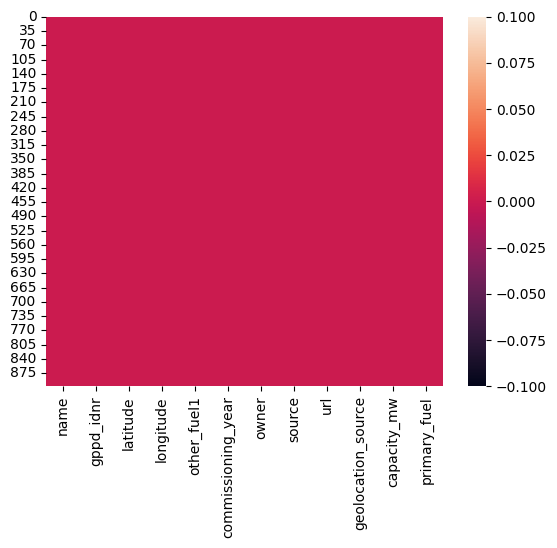

In [13]:
# The presence of non-null values is represented by the heatmap.
sns.heatmap(df.isnull())

In [14]:
# Short information.
df.describe()

,latitude,longitude,commissioning_year,capacity_mw
count,908.000000,908.000000,908.000000,908.000000
mean,21.225679,77.410936,1998.183921,321.046378
std,6.089450,4.783873,13.085938,580.221767
min,8.168900,68.644700,1927.000000,0.000000
25%,17.057825,74.390250,1997.000000,16.837500
50%,21.778300,76.719250,2000.000000,60.000000
75%,25.183775,79.211600,2003.000000,388.125000
max,34.649000,95.408000,2018.000000,4760.000000


#### We can observe the data, which shows that there are non-null columns present, along with skewness and outliers. Let's take a closer look and examine these observations further.

#### Distribution and Skewness

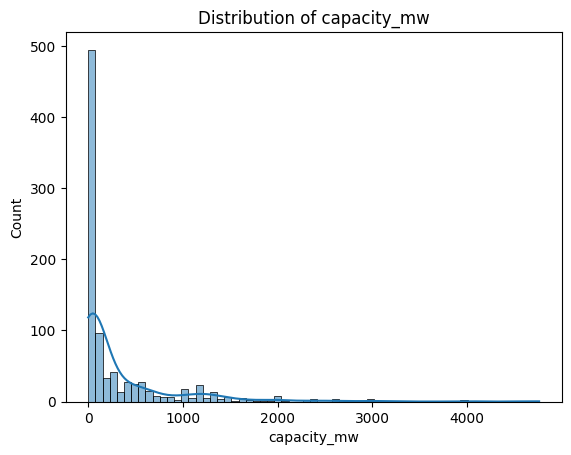

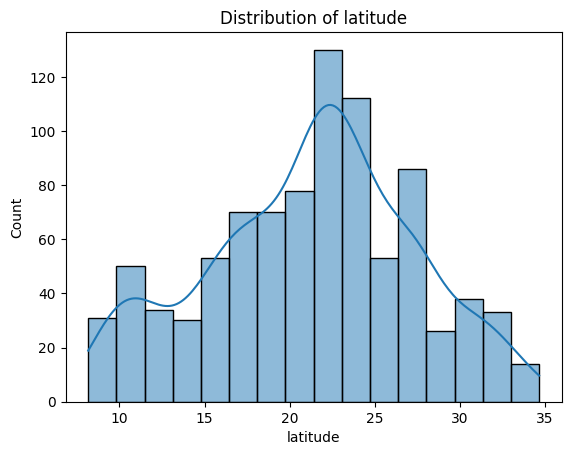

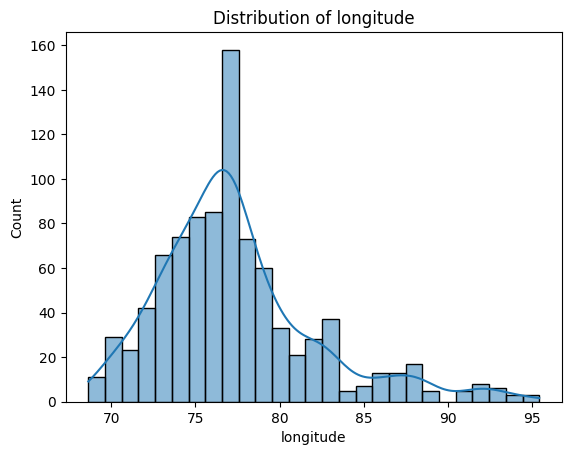

Skewness of numerical features:
 capacity_mw    3.193257
latitude      -0.161811
longitude      1.150963
dtype: float64


In [15]:
# numerical features
num_df = ['capacity_mw', 'latitude', 'longitude']

for feature in num_df:
    sns.histplot(df[feature].dropna(), kde=True)
    plt.title(f'Distribution of {feature}')
    plt.show()
    
# Check skewness
skewness = df[num_df].skew()
print('Skewness of numerical features:\n', skewness)

### Checking visualization presentation

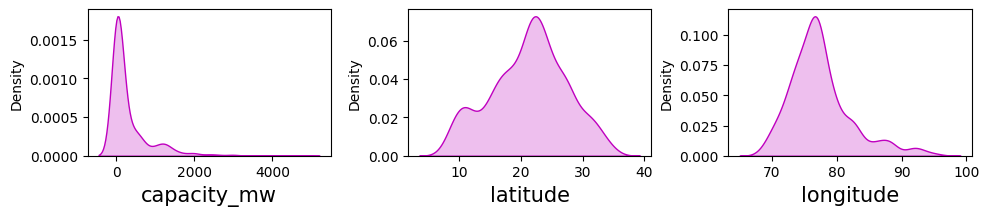

In [16]:
plt.figure(figsize=(10,6), facecolor='White')
plotnumber = 1
for col in num_df:
    if plotnumber <=9:
        ax = plt.subplot(3,3,plotnumber)
        sns.distplot(df[col], color='m', kde_kws={'shade' : True}, hist=False)
        plt.xlabel(col, fontsize= 15)
        plt.yticks(rotation=0, fontsize=10)
    plotnumber+=1
plt.tight_layout()

##### Removing Skewness

In [17]:
# Removing the skewness by using Cube root square.
for col in num_df:
    if abs(skewness[col]) > 0.5:
        df[col] = np.cbrt(df[col])

In [18]:
# After removing the skewness

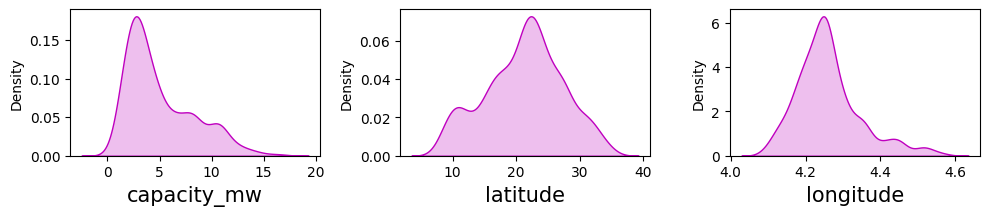

In [19]:
plt.figure(figsize=(10,6), facecolor='White')
plotnumber = 1
for col in num_df:
    if plotnumber <=9:
        ax = plt.subplot(3,3,plotnumber)
        sns.distplot(df[col], color='m', kde_kws={'shade' : True}, hist=False)
        plt.xlabel(col, fontsize= 15)
        plt.yticks(rotation=0, fontsize=10)
    plotnumber+=1
plt.tight_layout()

#### Outlier Detection

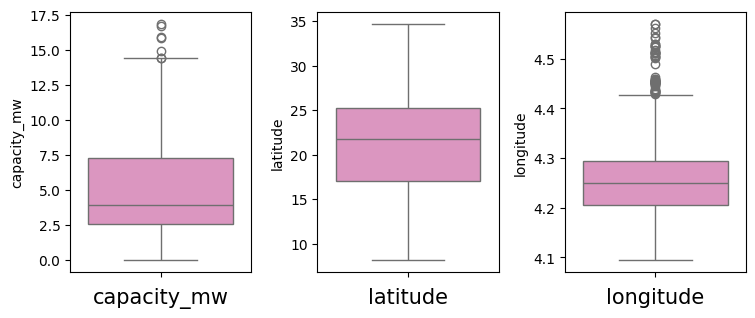

In [20]:
plt.figure(figsize=(10,6), facecolor='White')
plotnumber = 1
for col in num_df:
    if plotnumber <=8:
        ax = plt.subplot(2,4,plotnumber)
        sns.boxplot(df[col], palette='Set2_r')
        plt.xlabel(col, fontsize= 15)
        plt.yticks(rotation=0, fontsize=10)
    plotnumber+=1
plt.tight_layout()

In [21]:
# Detecting and removing outliers using the IQR method.

# Function to remove outliers
def removing_outliers_from_iqr_method(df, columns):
    new_df = df.copy()
    for col in columns:
        Q1 = new_df[col].quantile(0.25)
        Q3 = new_df[col].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        new_df = new_df[(new_df[col] >= lower_bound) & (new_df[col] <= upper_bound)]
    return new_df

print("\nData shape before and after outlier removal:")
print("Before:", df.shape)

# Apply outlier removal
columns_to_check = num_df
df = removing_outliers_from_iqr_method(df, columns_to_check)

print("After:", df.shape)


Data shape before and after outlier removal:
Before: (908, 12)
After: (843, 12)


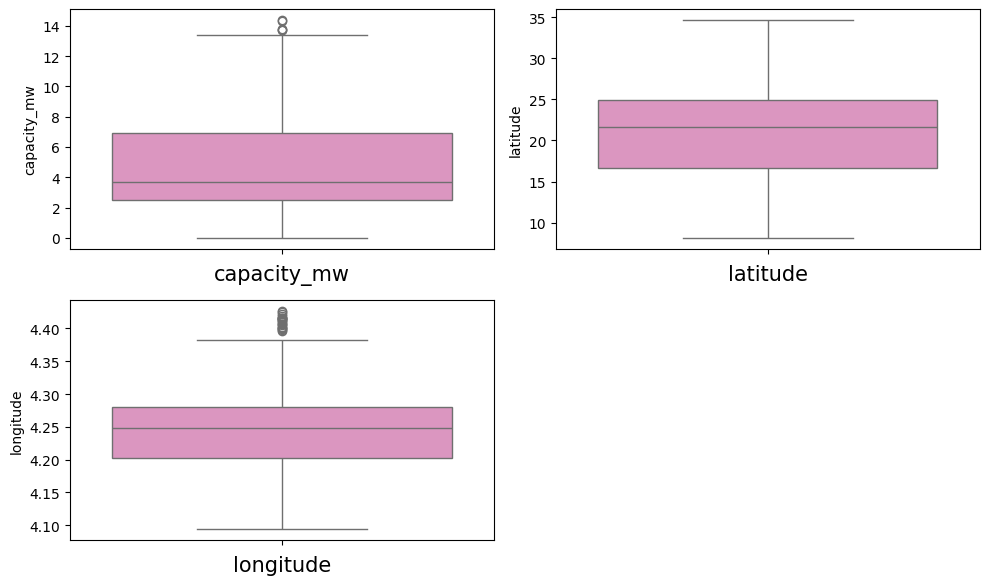

In [22]:
# After removing all the possible outliers.
plt.figure(figsize=(10,6), facecolor='White')
plotnumber = 1
for col in num_df:
    if plotnumber <=4:
        ax = plt.subplot(2,2,plotnumber)
        sns.boxplot(df[col], palette='Set2_r')
        plt.xlabel(col, fontsize= 15)
        plt.yticks(rotation=0, fontsize=10)
    plotnumber+=1
plt.tight_layout()

# Correlation Matrix

In [23]:
# Select only numerical columns
numerical_cols = df.select_dtypes(include=['float64', 'int64']).columns

# Calculate the correlation matrix
corr = df[numerical_cols].corr()
corr

,latitude,longitude,commissioning_year,capacity_mw
latitude,1.000000,-0.120466,0.083761,0.055216
longitude,-0.120466,1.000000,0.034928,0.364347
commissioning_year,0.083761,0.034928,1.000000,0.199385
capacity_mw,0.055216,0.364347,0.199385,1.000000


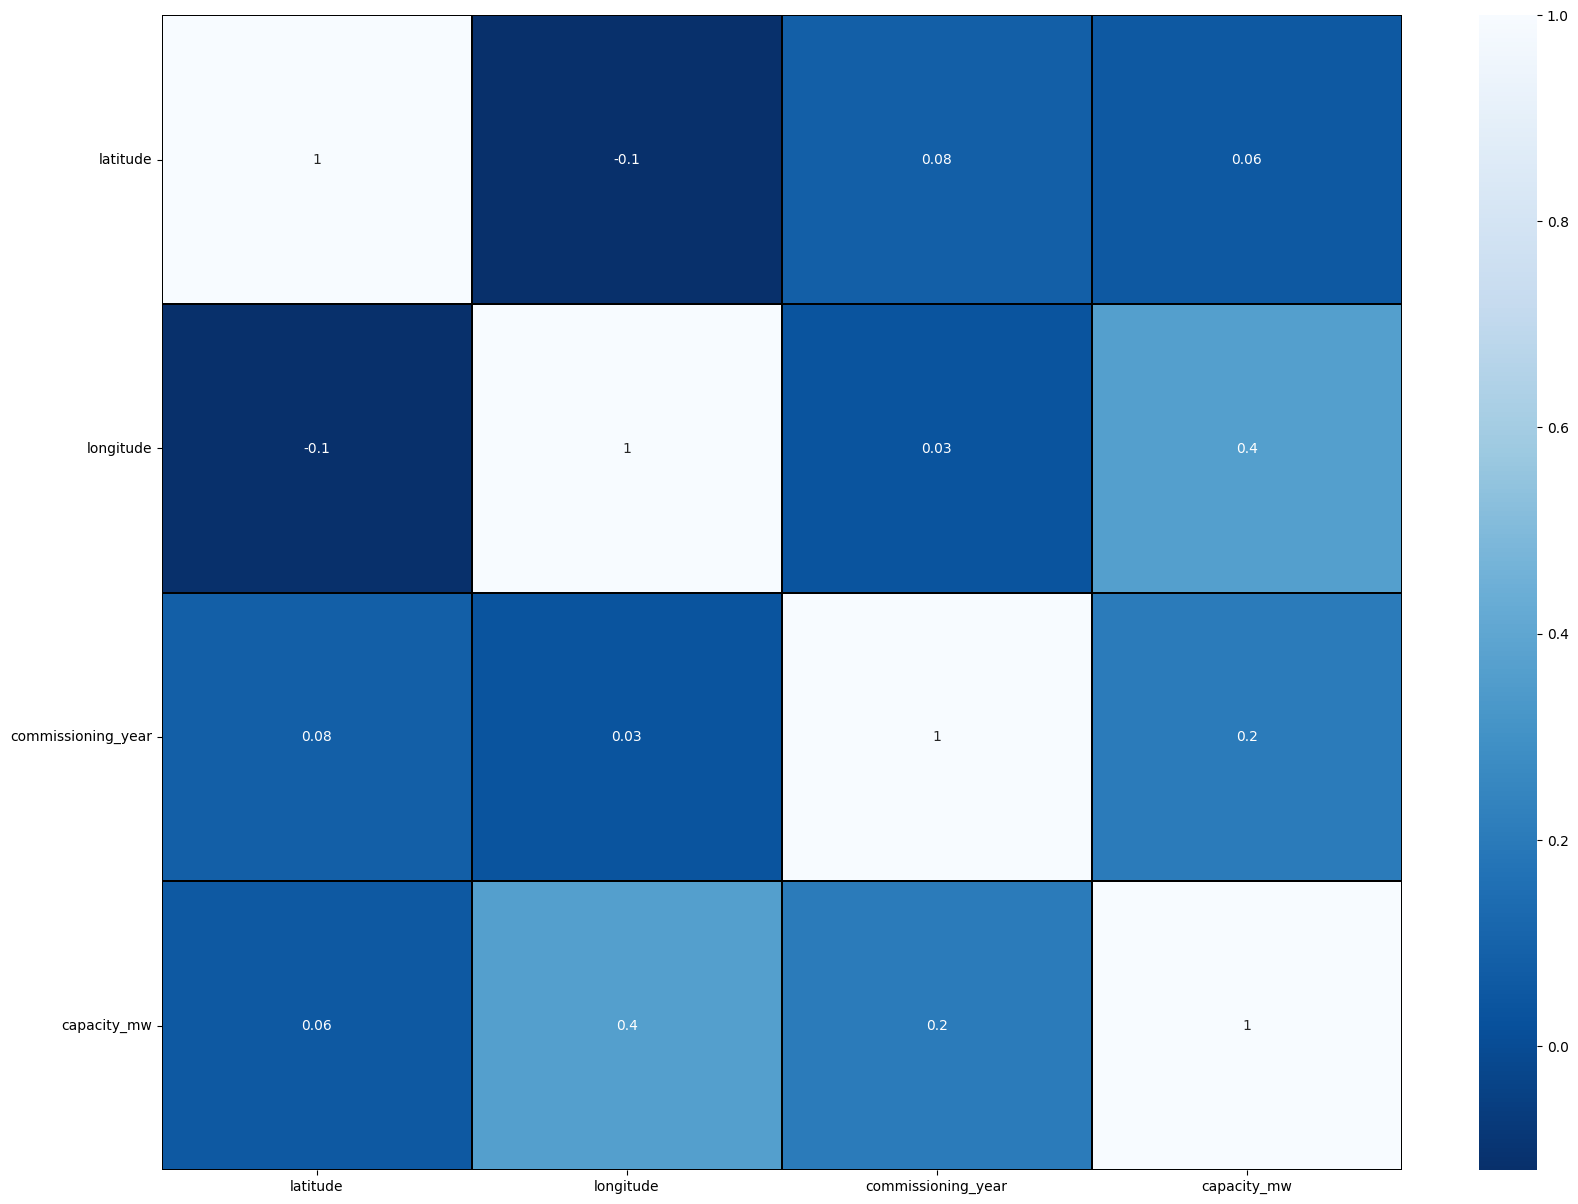

In [24]:
# Visualizing the correlation matrix by plotting heatmap
plt.figure(figsize=(20,15))
sns.heatmap(corr, linewidths=0.1, fmt=".1g", linecolor="black",annot=True,cmap="Blues_r")
plt.yticks(rotation = 0)

plt.show()

In [25]:
corr['capacity_mw'].sort_values(ascending=False)

capacity_mw           1.000000
longitude             0.364347
commissioning_year    0.199385
latitude              0.055216
Name: capacity_mw, dtype: float64

# Encoding categorial columns using OrdinalEncodes

In [26]:
from sklearn.preprocessing import OrdinalEncoder
OE = OrdinalEncoder()
for i in df.columns:
    if df[i].dtype == 'object':
        df[i] = OE.fit_transform(df[i].values.reshape(-1,1))

In [27]:
# # Separating feature and label
# x = df.drop(['primary_fuel', 'country', 'country_long', 'generation_data_source'], axis=1)
# y = df['primary_fuel']

In [28]:
# # Feature Scaling using Standard Scalarization
# from sklearn.preprocessing import StandardScaler
# scaler = StandardScaler()
# x = pd.DataFrame(scaler.fit_transform(x), columns=x.columns)

In [29]:
# # Checking Variance Inflation Factor(VIF)
# # Checking VIF values to confirm whether multicollinearity exists or not.
# from statsmodels.stats.outliers_influence import variance_inflation_factor
# vif = pd.DataFrame()
# vif['VIF Values'] = [variance_inflation_factor(x.values, i) for i in range(len(x.columns))]
# vif['Feature'] = x.columns

In [30]:
# vif
# So, we can clearly see that there is no multicollinearity present, so we don't need to drop any columns.

In [31]:
# df.drop(['country', 'country_long', 'generation_data_source'], axis = 1, inplace = True)

In [32]:
df

,name,gppd_idnr,latitude,longitude,other_fuel1,commissioning_year,owner,source,url,geolocation_source,capacity_mw,primary_fuel
0,0.0,595.0,28.1839,4.183928,2.0,2011.0,228.0,109.0,127.0,1.0,1.357209,6.0
1,1.0,457.0,24.7663,4.209822,2.0,2000.0,257.0,174.0,172.0,2.0,4.610436,1.0
2,2.0,789.0,21.9038,4.108947,2.0,2000.0,2.0,21.0,204.0,2.0,3.396999,7.0
4,3.0,0.0,21.9603,4.351694,2.0,2015.0,5.0,22.0,57.0,2.0,12.164404,1.0
5,4.0,1.0,23.7689,4.094514,2.0,2005.0,5.0,22.0,57.0,2.0,6.299605,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...
903,838.0,437.0,16.2949,4.260882,2.0,2016.0,5.0,22.0,57.0,2.0,11.696071,1.0
904,839.0,758.0,12.8932,4.275677,2.0,2000.0,114.0,77.0,22.0,0.0,1.442250,6.0
905,840.0,827.0,15.2758,4.228027,2.0,2000.0,5.0,21.0,259.0,2.0,2.943383,7.0
906,841.0,477.0,24.3500,4.193560,2.0,2000.0,91.0,59.0,81.0,2.0,4.308869,1.0


# Modeling
### Predicting Primary Fuel (Classification)

In [33]:
# Classification Algorithmfrom
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier, GradientBoostingClassifier, BaggingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, accuracy_score
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Feature selection
x = df.drop('primary_fuel', axis=1)
y = df['primary_fuel']

In [34]:
# Finding the best accuracy at random state.
maxAcc = 0
maxRs = 0
for i in range(1, 200):
    x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.30, random_state=i)
    RER = RandomForestClassifier()
    RER.fit(x_train, y_train)
    pred = RER.predict(x_test)
    acc = accuracy_score(y_test, pred)
    if acc > maxAcc:
        maxAcc = acc
        maxRs = i
print("Best Accuracy is ", maxAcc, "at random_state ", maxRs)

Best Accuracy is  0.8932806324110671 at random_state  185


In [35]:
# Split data into train and test sets
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=maxRs)

# Random Forest Classifier

In [36]:
# Checking accuracy for Random Forest Classifier
RFC = RandomForestClassifier(random_state=maxRs)
RFC.fit(x_train, y_train)
predRFC = RFC.predict(x_test)

In [37]:
print("Accuracy of this model ", accuracy_score(y_test, predRFC)*100)

print(confusion_matrix(y_test, predRFC))

print(classification_report(y_test, predRFC))

Accuracy of this model  89.32806324110672
[[11  4  0  0  0  0  0  0]
 [ 1 60  1  7  0  1  0  0]
 [ 0  3  9  1  0  0  0  0]
 [ 0  3  0 64  0  0  0  0]
 [ 0  2  0  1  0  0  0  0]
 [ 0  1  1  1  0  1  0  0]
 [ 0  0  0  0  0  0 37  0]
 [ 0  0  0  0  0  0  0 44]]
              precision    recall  f1-score   support

         0.0       0.92      0.73      0.81        15
         1.0       0.82      0.86      0.84        70
         2.0       0.82      0.69      0.75        13
         3.0       0.86      0.96      0.91        67
         4.0       0.00      0.00      0.00         3
         5.0       0.50      0.25      0.33         4
         6.0       1.00      1.00      1.00        37
         7.0       1.00      1.00      1.00        44

    accuracy                           0.89       253
   macro avg       0.74      0.69      0.71       253
weighted avg       0.88      0.89      0.88       253



In [38]:
# Cross_val_score this will check the performance of model.
score = cross_val_score(RFC, x, y)
print(score)
print(score.mean())

# cross validation
accuracy_score(y_test, predRFC) - score.mean()

[0.82248521 0.85207101 0.85798817 0.81547619 0.85714286]
0.8410326852634544


0.05224794714761272

# Hyper Parameter Turning

In [39]:
# Random Forest Classifier
parameter = {
    'criterion' : ['gini', 'entropy'],
    'random_state' : [10, 50, 1000],
    'max_depth' : [0, 10, 20],
    'n_jobs' : [-2, -1, 1],
    'n_estimators' : [50, 100, 200, 300]
}
GCV = GridSearchCV(RandomForestClassifier(), parameter, cv=6)
GCV.fit(x_train, y_train)

GridSearchCV(cv=6, estimator=RandomForestClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [0, 10, 20],
                         'n_estimators': [50, 100, 200, 300],
                         'n_jobs': [-2, -1, 1],
                         'random_state': [10, 50, 1000]})

In [40]:
Final_model = RandomForestClassifier(criterion='entropy', max_depth=10, n_estimators= 100, n_jobs=-2, random_state=183)
Final_model.fit(x_train, y_train)
pred = Final_model.predict(x_test)
acc = accuracy_score(y_test, pred)
acc

0.8893280632411067

# Predicting capacity_mw (Regression)

In [41]:
# Feature selection for regression (exclude the target 'capacity_mw')
x_reg = df.drop(['capacity_mw', 'gppd_idnr', 'name', 'owner'], axis=1)
y_reg = df['capacity_mw']

In [50]:
# Finding the best R-squared at random state.
max_r2 = 0
best_random_state = 0

# Loop through random states to find the best one
for i in range(1, 300):
    x_train, x_test, y_train, y_test = train_test_split(x_reg, y_reg, test_size=0.30, random_state=i)
    RFR_regressor = RandomForestRegressor()
    RFR_regressor.fit(x_train, y_train)
    
    # Predict and evaluate the model
    y_pred_reg = RFR_regressor.predict(x_test)
    r2 = r2_score(y_test, y_pred_reg)
    
    # Update the best R-squared and random state
    if r2 > max_r2:
        max_r2 = r2
        best_random_state = i

# Print the best R-squared and corresponding random state
print("Best R-squared:", max_r2, "at random_state:", best_random_state)

Best R-squared: 0.7049217752453326 at random_state: 193


In [51]:
# Split data into train and test sets.
x_reg_train, x_reg_test, y_reg_train, y_reg_test = train_test_split(x_reg, y_reg, test_size=0.3, random_state=best_random_state)

# Train a Random Forest Regressor
RFR_regressor = RandomForestRegressor()
RFR_regressor.fit(x_reg_train, y_reg_train)

RandomForestRegressor()

In [52]:
# Predictions and Evaluation
y_reg_pred = RFR_regressor.predict(x_reg_test)
print('RMSE:', mean_squared_error(y_reg_test, y_reg_pred, squared=False))
print('R-squared:', r2_score(y_reg_test, y_reg_pred))

RMSE: 1.7684476748102333
R-squared: 0.7039677171694569


# Hyperparameter Tuning with Random Forest

In [60]:
from sklearn.model_selection import RandomizedSearchCV

# Parameter distribution for Randomized Search
param_dist = {
    'n_estimators': [400, 500, 600, 700],
    'max_depth': [30, 40, 50, 60, 70],
    'min_samples_split': [5, 10, 15, 20],
    'min_samples_leaf': [2, 4, 6, 8],
    'bootstrap': [True, False]
}

# Performing randomized search with cross-validation
random_search = RandomizedSearchCV(estimator=RandomForestRegressor(),
                                   param_distributions=param_dist,
                                   n_iter=100,
                                   cv=6, n_jobs=-1, verbose=2, scoring='neg_mean_squared_error')

# Fitting the model
random_search.fit(x_reg_train, y_reg_train)

Fitting 6 folds for each of 100 candidates, totalling 600 fits


RandomizedSearchCV(cv=6, estimator=RandomForestRegressor(), n_iter=100,
                   n_jobs=-1,
                   param_distributions={'bootstrap': [True, False],
                                        'max_depth': [30, 40, 50, 60, 70],
                                        'min_samples_leaf': [2, 4, 6, 8],
                                        'min_samples_split': [5, 10, 15, 20],
                                        'n_estimators': [400, 500, 600, 700]},
                   scoring='neg_mean_squared_error', verbose=2)

In [61]:
# Displaying the best model and its parameters
print("Best parameters found: ", random_search.best_params_)
best_rf_regressor = random_search.best_estimator_

# Predict and evaluate
y_reg_pred = best_rf_regressor.predict(x_reg_test)

# Calculate metrics
mse = mean_squared_error(y_reg_test, y_reg_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_reg_test, y_reg_pred)

print(f'MSE: {mse}')
print(f'RMSE: {rmse}')
print(f'R-squared: {r2}')

Best parameters found:  {'n_estimators': 400, 'min_samples_split': 10, 'min_samples_leaf': 2, 'max_depth': 60, 'bootstrap': True}
MSE: 3.2290516310151576
RMSE: 1.7969562128819827
R-squared: 0.6943463159303632


# Saving the predictions.

In [62]:
import joblib

# Saving the model.
joblib.dump(best_rf_regressor, 'global_power.pkl')

['global_power.pkl']

In [63]:
# Predicting the saved model
model = joblib.load('global_power.pkl')
prediction = model.predict(x_reg_test)

In [64]:
# Confirming
a = np.array(y_reg_test)
df = pd.DataFrame()
df['Predict'] = prediction
df['Original'] = a
df

,Predict,Original
0,2.718186,2.466212
1,8.837299,7.937005
2,3.600901,2.237378
3,3.287627,3.693830
4,4.176521,3.419952
...,...,...
248,3.338171,2.916199
249,8.416722,10.591045
250,3.553989,2.154435
251,3.485859,4.308869
